<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression

What we're going to cover
* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (*features* & *labels*)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

### Introduction to Regression with Neural Networks

**Regression** — predicting a numerical value based on some combination of variables

In [17]:
# Import TensorFlow
import tensorflow as tf
# Import NumPy and MatPlotLib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

### Creating data to view and fit

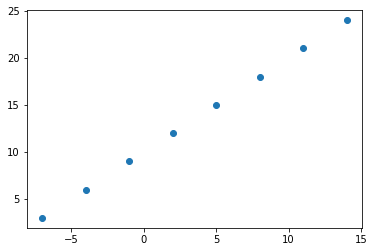

In [18]:
# Create features
_X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
_y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(_X, _y)

In [19]:
_y == _X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [20]:
# Create a demo tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [21]:
# Check the X and y feature shapes
input_shape = _X[0].shape
output_shape = _y[0].shape
input_shape, output_shape

((), ())

In [22]:
_X[0].ndim

0

In [23]:
_X[0], _y[0]

(-7.0, 3.0)

In [24]:
_X[1], _y[1]

(-4.0, 6.0)

In [25]:
# Turn NumPy array into tensors with dtype float32
X = tf.constant(_X, dtype=tf.float32)
y = tf.constant(_y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow

1. **Creating a model** — define the `input` and `output layers`, as well as the `hidden layers` of a deep learning model.
2. **Compiling a model** — define the `loss function` (it tells our model how wrong it is) and the `optimizer` (it tells our model how to improve the patterns its learning) and `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fitting a model** — letting the model try to find patterns between `features` and `labels`

In [27]:
# Set a random seed
tf.random.set_seed(42)

In [28]:
# Create a model using the Sequential API
# The Input layer specifies that you are working with scalar inputs
model = tf.keras.Sequential([tf.keras.Input(shape=(1,)), tf.keras.layers.Dense(1)])

# Compile the model
## mae > Mean Absolute Error
## SGD > Stochastic Gradient Descent
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 287ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [29]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

### Improving the model

Improve the model by altering the steps taken in creating the model.
1. **Creating a model** — add more layer, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** — change the optimization function or perhaps the `learning rate` of the optimization function.
3. **Fitting a model** — fit a model for more `epochs` (leave it training for longer) or on more data (give the model more data to learn from)

In [31]:
# Rebuild the model

# Create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (train the model longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 273ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 7

In [32]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [34]:
# Rebuild the model again

# Create the model (add a hidden layer with 100 neurons)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 319ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 8ms/step

In [35]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [36]:
# Predict
model.predict([17.0])

array([[31.223137]], dtype=float32)

In [37]:
# Rebuild the model again

# Create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model (change the optimizer, changing the learning_rate from 0.0001 to 0.01 brings the prediction much closer to the desired output)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 347ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - lo

In [38]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [39]:
# Predict again (y should be near 27)
model.predict([17.0])

array([[26.43606]], dtype=float32)

### Evaluating a model

When evaluating it's a good idea to visualize:
* *The data* — what data are we working with? what does it look like?
* *The model itself* — what does our model look like?
* *The training of a model* — how does a model perform while it learns?
* *The predictions of the model* — how do the predictions of a model line up against the `ground truth` (`original labels`)?


In [40]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [41]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

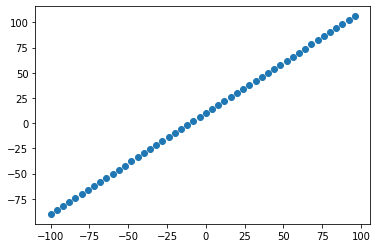

In [42]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Traninng set** — the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** — the model gets tuned on this data, which is 10-15% of the data available.
* **Test set** — the model gets evaluated on this data to test what it has learned, this set is 10-15% of the total data available.

In [43]:
# Check how many samples we have
len(X)

50

In [44]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [45]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

### Visualizing the data

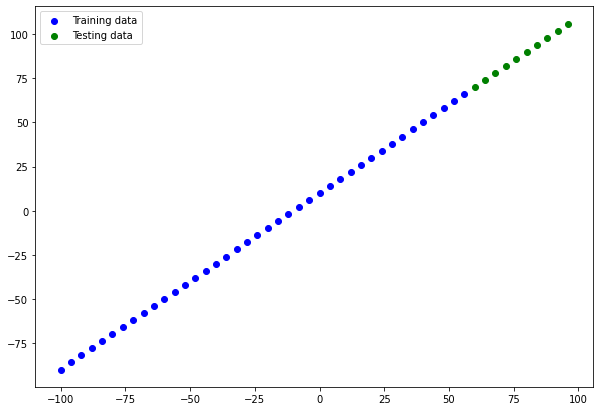

In [46]:
plt.figure(figsize=(10, 7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend()
plt.legend()

In [47]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=100)

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** — total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** — these parameters aren't updated during training.

📖 **Resource:** [Introduction to Deep Learning](https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&ab_channel=AlexanderAmini)

In [51]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

⚒ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number parameters (total and trainable) by calling `model.summary()`

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mae")

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 45.3309 - mae: 45.3309
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 28.6364 - mae: 28.6364
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 12.9839 - mae: 12.9839
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2116 - mae: 9.2116
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4002 - mae: 11.4002
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 7.2178 - mae: 7.2178
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 5.5000 - mae: 5.5000
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5721 - mae: 7.5721
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5545 - mae: 7.5545
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 5.3523 - mae: 5.3523
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss

In [53]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 50)                550       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


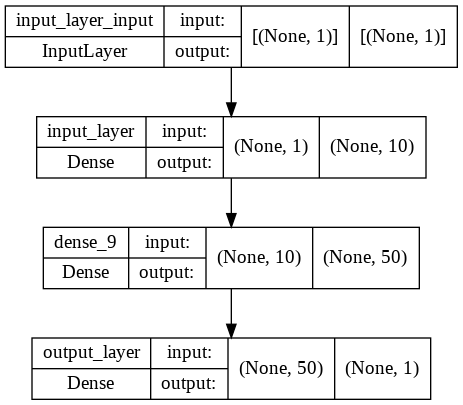

In [54]:
tf.keras.utils.plot_model(model=model, show_shapes=True)

### Visualizing the model's prediction

It's a good idea to plot the model's predictions against the ground truth labels

`y_test` vs `y_pred`

In [55]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 75.329865],
       [ 79.642715],
       [ 83.95557 ],
       [ 88.268425],
       [ 92.581276],
       [ 96.894135],
       [101.20699 ],
       [105.519844],
       [109.8327  ],
       [114.14555 ]], dtype=float32)

In [56]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** It's a good idea to create a function if you're going to reuse some kind of functionality in the future

In [57]:
def plot_predictions(train_data=X_train, train_label=y_train,
                     test_data=X_test, test_label=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legends
  plt.legend()

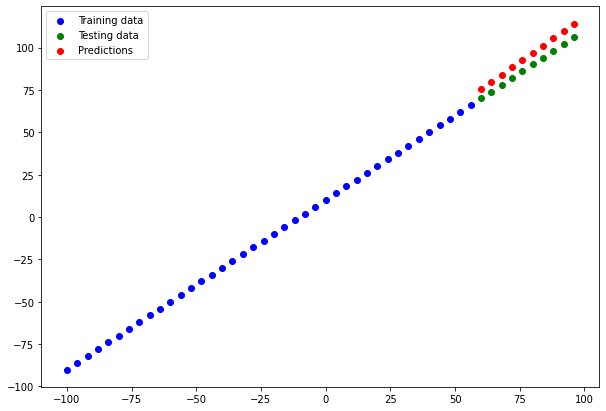

In [58]:
# Call the function
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

2 main metrics:
* `MAE` — Mean Absolute Error, used as a great starter metric for any regression problem.
* `MSE` — Mean Squared Error, used when larger errors are more significant than smaller errors.

In [59]:
# Evaluate the model on the test dataset
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 136ms/step - loss: 6.7377 - mae: 6.7377


[6.737706661224365, 6.737706661224365]

In [60]:
# Calculate the Mean Absolute Error
mae = tf.keras.metrics.mae(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.002081, 11.742914, 10.408887, 10.      , 10.516255, 11.957654,
       14.324196, 17.615875, 21.832703, 26.145554], dtype=float32)>

In [61]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 75.329865],
       [ 79.642715],
       [ 83.95557 ],
       [ 88.268425],
       [ 92.581276],
       [ 96.894135],
       [101.20699 ],
       [105.519844],
       [109.8327  ],
       [114.14555 ]], dtype=float32)>

In [62]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [63]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.329865,  79.642715,  83.95557 ,  88.268425,  92.581276,
        96.894135, 101.20699 , 105.519844, 109.8327  , 114.14555 ],
      dtype=float32)>

In [64]:
tf.cast(y_test, dtype=tf.float32) - tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-5.3298645, -5.6427155, -5.9555664, -6.268425 , -6.581276 ,
       -6.8941345, -7.206993 , -7.519844 , -7.8327026, -8.145554 ],
      dtype=float32)>

In [65]:
mae = tf.metrics.mae(tf.cast(y_test, dtype=tf.float32), tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.7377076>

In [68]:
# Calculate the Mean Squared Error
mse = tf.metrics.mse(y_test, y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([292.53235, 201.84421, 148.35745, 132.07205, 152.9881 , 211.10564,
       306.42465, 438.9449 , 608.6669 , 815.59   ], dtype=float32)>

In [69]:
mse = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=46.2042>

In [79]:
# Create a function that reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [72]:
mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=6.7377076>

In [73]:
mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=46.2042>

### Running experiments to improve our model

1. Get more data — get more examples for the model to train on.
2. Make the model larger (using a more complex model) — this might come in the form of more layer or more hidden units in each layer.
3. Train for longer — give the model more chance to find patterns in the data.

In [74]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Build `model_1 > 1 layer - 100 epochs`

In [76]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

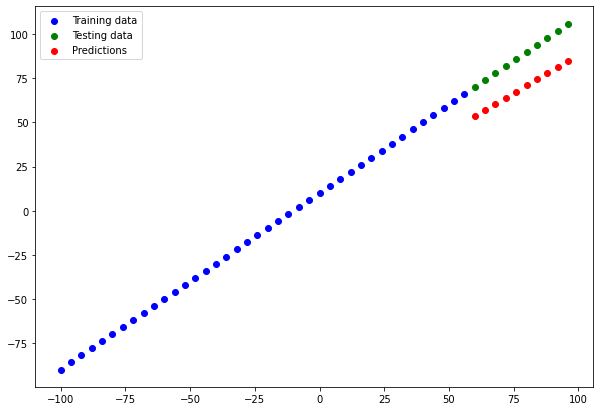

In [77]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [80]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### Build `model_2 > 2 dense layers - 100 epochs`

In [92]:
# Set random seed
tf.random.set_seed(42)

# Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1,], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# Compile model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mse")

# Fit model_2
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [=========================

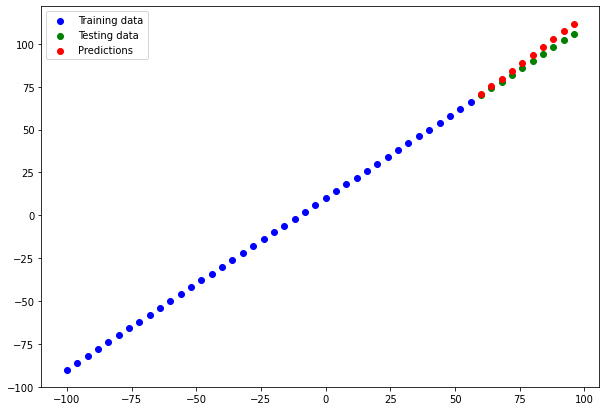

In [93]:
# Make and plot the predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [95]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

### Build `model_3 > 2 layers - 500 epochs`

In [99]:
# Set random seed
tf.random.set_seed(42)

# Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1,]),
    tf.keras.layers.Dense(1)
])

# Compile model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit model_3
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 6ms/

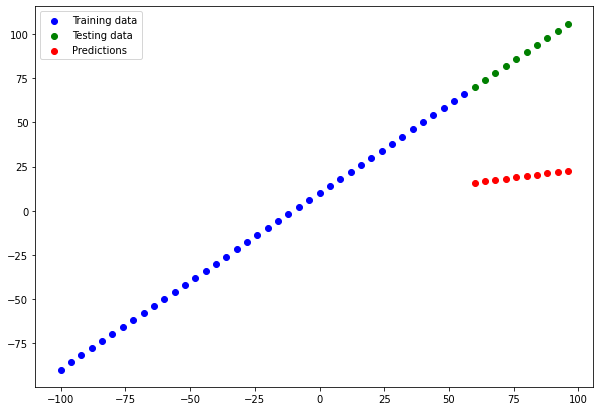

In [100]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [98]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)